In [1]:
import numpy as np
import scipy.linalg 
import re
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine as cos_dist

# Similarity of texts

In [2]:
with open('sentences.txt', 'r') as file:
    lines = file.readlines()

In [3]:
lines = [line.lower() for line in lines]

In [4]:
sentences = [re.split('[^a-z]', line) for line in lines]

In [5]:
empty_token = ''

for sentence in sentences:
    while empty_token in sentence:
        sentence.remove(empty_token)

In [6]:
words = {}
index = 0

for sentence in sentences:
    for word in sentence:
        if word not in words.keys():
            words[word] = index
            index+=1

In [7]:
word_matrix = np.zeros(shape=(len(sentences), len(words)))

for i in range(len(sentences)):
    for word in sentences[i]:
        word_matrix[i, words[word]] += 1

In [8]:
distances = np.empty(shape=(len(sentences) -1))

for i in range(1, len(sentences)):
    distances[i-1] = cos_dist(word_matrix[0,:], word_matrix[i,:])

In [9]:
top_distance = distances.argsort()[:2] + 1

In [10]:
answer1 = " ".join([str(index) for index in top_distance])

with open('answer-1.txt', 'w') as file:
    file.write(answer1)

# Approximation

In [11]:
def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

In [12]:
def plotFunc(f=f, x=np.arange(1,15,0.01)):    
    y = f(x)
    plt.plot(x, y)

In [13]:
def generateA(x):
    A = np.empty(shape=(len(x), len(x)))
    for i in range(len(x)):
        A[:,i] = x**i
    return A    

In [14]:
def getApproximationCoefs(x, f):
    b = f(x)
    A = generateA(x)
    return scipy.linalg.solve(A, b)

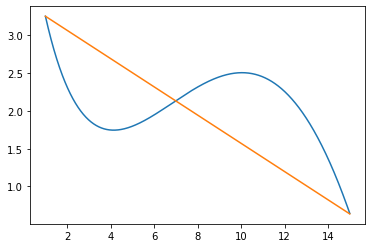

In [15]:
coefs2 = getApproximationCoefs(np.array([1, 15]), f)

x = np.arange(1,15,0.01)
plotFunc()
y_new = coefs2[1]*x + coefs2[0]
plt.plot(x, y_new)

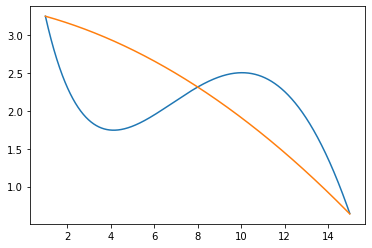

In [16]:
coefs3 = getApproximationCoefs(np.array([1, 8, 15]), f)

plotFunc()
y_new = coefs3[2]*x**2 + coefs3[1]*x + coefs3[0]
plt.plot(x, y_new)

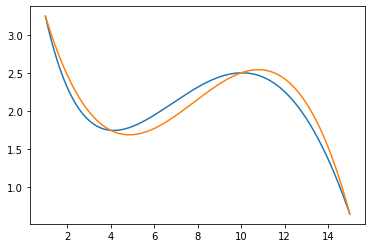

In [17]:
coefs4 = getApproximationCoefs(np.array([1, 4, 10, 15]), f)

plotFunc()
y_new = coefs4[3]*x**3 + coefs4[2]*x**2 + coefs4[1]*x + coefs4[0]
plt.plot(x, y_new)

In [18]:
answer2 = " ".join([str(value) for value in coefs4])

with open('answer-2.txt', 'w') as file:
    file.write(answer2)